## Assignment 3

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

# NB: From now on you should submit 1) your notebook with the answers, remember that comments are good practice, 2) a working Git page with your assignment

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

In [2]:
# examine the data to see if any changes need to be made before fully importing
test = pd.read_csv("C:\\Users\\natha\\Desktop\\Data 1 Class\\03_Lab_02\\lab-02\\data\\goodreads.csv")

# the goodreads data is missing headers.

# create a list of the new header titles.
new_headers = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']

# Load the goodreads data with a new additional header line.
goodreads_dirty = pd.read_csv("C:\\Users\\natha\\Desktop\\Data 1 Class\\03_Lab_02\\lab-02\\data\\goodreads.csv", header=None,
                         names=new_headers)

# look at the first and last 5 rows
goodreads_dirty.head()
goodreads_dirty.tail()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
5995,4.17,2226.0,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618.0,The River of Doubt
5996,3.99,775.0,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179.0,Shug
5997,3.78,540.0,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971.0,Flawed
5998,3.91,281.0,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083.0,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
5999,4.35,61.0,0786929081,good_reads:book,https://www.goodreads.com/author/show/1023510....,2001.0,/genres/fiction|/genres/fantasy|/genres/magic|...,dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...,3982.0,Legacy of the Drow Collector's Edition (Legacy...


## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [3]:
# create a new dataframe with only the data we want to keep.

goodreads_subset = goodreads_dirty.loc[:, ['rating', 'isbn', 'author_url', 'year', 'genre_urls', 'name']]
goodreads_subset.head()

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [4]:
# Count the missing values in each column
null_count = goodreads_subset.isnull().sum()
null_count

rating          2
isbn          477
author_url      2
year            7
genre_urls     62
name            2
dtype: int64

In [5]:
# ISBN - we have a lot of missing isbn numbers, these should be treated as empty strings since they are id numbers and should not be used in operations.
goodreads_subset[goodreads_subset.isbn.isnull()]                    # identify rows with empty isbn information
goodreads_subset.loc[goodreads_subset.isbn.isnull(), 'isbn']=""     # replace NaN with empty string
goodreads_subset.loc[16]                                            # confirming that it worked. 

rating                                                     3.92
isbn                                                           
author_url    https://www.goodreads.com/author/show/498072.A...
year                                                     2003.0
genre_urls    /genres/fiction|/genres/romance|/genres/fantas...
name                                   The Time Traveler's Wife
Name: 16, dtype: object

In [6]:
# GENRE URL - we have a lot of null genre_urls. We should remove these rows as they break our 'author' function in the next exercise.
goodreads_subset[goodreads_subset.genre_urls.isnull()]                          # identify rows with empty genre information
goodreads_subset.loc[goodreads_subset.genre_urls.isnull(), 'genre_urls']=""     # replace NaN with empty string
goodreads_subset.loc[953]                                                       # confirm that it worked

rating                                                     4.56
isbn                                                 1477276068
author_url    https://www.goodreads.com/author/show/6621980....
year                                                     2012.0
genre_urls                                                     
name                                          Crossing the Seas
Name: 953, dtype: object

In [31]:
# YEAR - we have 7 missing years. It should be ok to make these nulls an empty string, since we can still sort strings by chronological order.
goodreads_subset[goodreads_subset.year.isnull()]                    # identify rows with missing year.
goodreads_subset.loc[goodreads_subset.year.isnull(), 'year']=""     # replace NaN with empty string
goodreads_subset.loc[2442]                                          # confirm that it worked

rating                                                     4.23
isbn                                                           
author_url    https://www.goodreads.com/author/show/623606.A...
year                                                           
genre_urls    /genres/religion|/genres/islam|/genres/non-fic...
name                                                  La Tahzan
Name: 2442, dtype: object

In [8]:
# RATING - delete books that don't have rating. It is not possible to assume/fill the missing ratings and it makes the dataset harder to use.
goodreads = goodreads_subset[goodreads_subset.rating.notnull()]
goodreads.isnull().sum()

rating        0
isbn          0
author_url    0
year          0
genre_urls    0
name          0
dtype: int64

In [9]:
goodreads.dtypes

rating        float64
isbn           object
author_url     object
year           object
genre_urls     object
name           object
dtype: object

## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [10]:
test = goodreads.author_url[0]

test.split('.')[-1]

'Suzanne_Collins'

In [11]:
def get_author(url):
    name = url.split('.')[-1]
    return name

goodreads['Author'] = goodreads.author_url.map(get_author)

C:\Users\natha\AppData\Local\Temp\ipykernel_17532\3963922521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodreads['Author'] = goodreads.author_url.map(get_author)


In [12]:
sort = ['rating', 'year']
goodreads.sort_values(by=sort, ascending=(False,True))


,rating,isbn,author_url,year,genre_urls,name,Author
2909,5.00,0983002215,https://www.goodreads.com/author/show/6589034....,2011.0,,Family Secrets,Rebekah_McClew
2145,5.00,1300589469,https://www.goodreads.com/author/show/6906561....,2012.0,,A Book About Absolutely Nothing.,I_M_Nobody
2903,5.00,0983002282,https://www.goodreads.com/author/show/6589034....,2012.0,,Obscured Darkness (Family Secrets #2),Rebekah_McClew
4473,5.00,,https://www.goodreads.com/author/show/6896621....,2012.0,,Patience's Love,Ronda_Paige
5692,5.00,,https://www.goodreads.com/author/show/5989528....,2012.0,,Abstraction In Theory - Laws Of Physical Trans...,Subhajit_Ganguly
...,...,...,...,...,...,...,...
5113,3.01,0452286530,https://www.goodreads.com/author/show/1448.Kar...,2004.0,/genres/fiction|/genres/womens-fiction|/genres...,The Jane Austen Book Club,Karen_Joy_Fowler
5844,2.97,0395083621,https://www.goodreads.com/author/show/30691.Ad...,1925.0,/genres/history|/genres/non-fiction|/genres/bi...,Mein Kampf,Adolf_Hitler
2609,2.90,,https://www.goodreads.com/author/show/7707820....,2013.0,/genres/romance|/genres/realistic-fiction|/gen...,How To Be A Perfect Girl,Mary_Williams
5979,2.77,0060988649,https://www.goodreads.com/author/show/7025.Gre...,2001.0,/genres/fantasy|/genres/fiction|/genres/myster...,Lost,Gregory_Maguire


## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [13]:
goodreads.to_csv("data/cleaned-goodreads.csv", index=False, header=True)

## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv procided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [17]:
# import the cleaned data set for the next couple of exercises
CleanGoodreads = pd.read_csv("C:\\Users\\natha\\Desktop\\Data 1 Class\\03_Lab_02\\lab-02\\data\\cleaned-goodreads.csv")
CleanGoodreads.head()

,rating,isbn,author_url,year,genre_urls,name,Author
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)",Stephenie_Meyer
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird,Harper_Lee
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice,Jane_Austen


In [35]:
# Calculate the correlation coefficient. Give me a short definition of this coefficient
_ = CleanGoodreads.loc[:, \
                       ['rating', 'year']]
_.corr(method='pearson')

,rating,year
rating,1.000000,0.055449
year,0.055449,1.000000


<Axes: xlabel='year', ylabel='rating'>

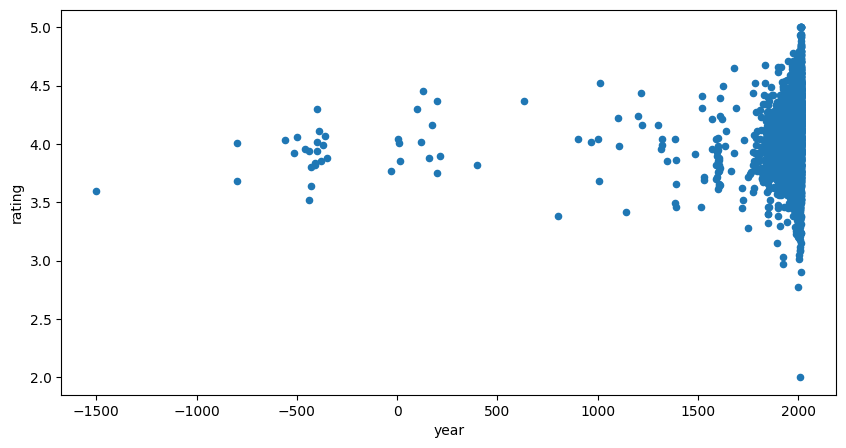

In [25]:
# create a scatter plot showing the relationship between the number of reviews and the average rating for books
CleanGoodreads.plot(kind='scatter', y='rating', x='year', figsize=(10,5))

# CONCLUSION: we have way more reviews for modern books. 
# While the average review seems to be a little less than 4, 
# the standard deviation is much greater for more modern books, than older books.

## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

In [42]:
print("mean is", CleanGoodreads.rating.mean())
print("median is", CleanGoodreads.rating.median())
print("standard deviation is", CleanGoodreads.rating.std())

mean is 4.04220073357786
median is 4.05
standard deviation is 0.26066082128186757


In [45]:
a = CleanGoodreads.rating.min()
b = CleanGoodreads.rating.max()

print("the minimum rating is", a, "the maximum rating is", b)

the minimum rating is 2.0 the maximum rating is 5.0


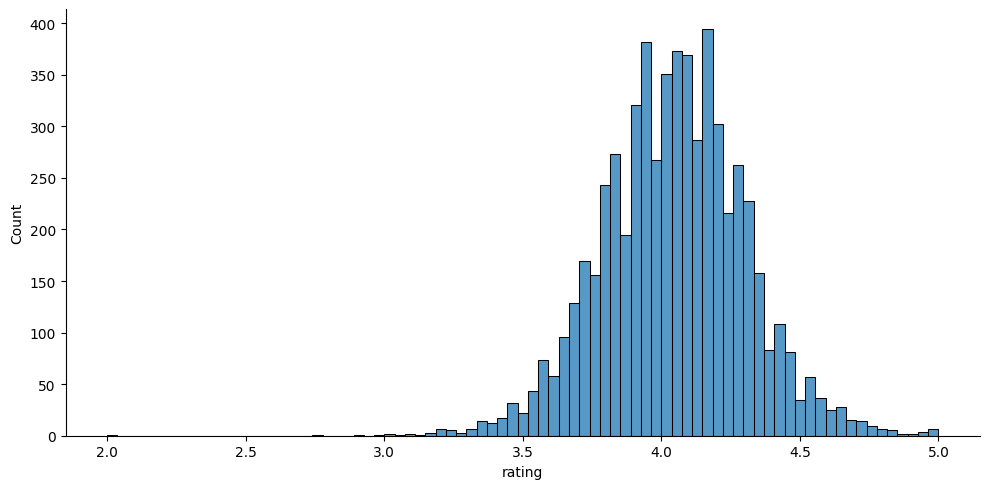

In [49]:
sns.displot(CleanGoodreads['rating'], aspect=2)